Group name : Fast Food

Group number : 13

Present: Tifferet Zagagi, Karin Nisanov, Yaniv Raubinov

Link : https://www.kaggle.com/denizyigit/fast-food-chains-nutrition-values?select=nutrition_values.csv

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt

## הדאטה שלנו מייצג מידע על שני רשתות מזון מהיר: בורגר קינג ומקדונלד'ס

**המידע שמופיע כולל את המוצרים שנמכרים ברשתות ואת הערכים התזונתיים שלהם**

**(g) כל הערכים מיוצגים בגרמים**

In [2]:
url = 'https://raw.githubusercontent.com/yaniv-raubinov/final_-project/main/nutrition_values.csv'
fast_food = pd.read_csv(url , sep=';')
fast_food.head()

,Chain,Item,Type,Serving Size (g),Calories,Calories from fat,Total Fat (g),Saturated Fat (g),Trans Fat (g),Chol (mg),Sodium (mg),Total Carb (g),Dietary Fiber (g),Total Sugar (g),Protein (g)
0,Burger King,Whopper Sandwich,Whopper Sandwiches,270,660,360,40,12,"1,5",90,980,49,2,11,28
1,Burger King,Whopper Sandwich with Cheese,Whopper Sandwiches,292,740,420,46,16,2,115,1340,50,2,11,32
2,Burger King,Bacon & Cheese Whopper Sandwich,Whopper Sandwiches,303,790,460,51,17,2,125,1560,50,2,11,35
3,Burger King,Double Whopper Sandwich,Whopper Sandwiches,354,900,520,58,20,3,175,1050,49,2,11,48
4,Burger King,Double Whopper Sandwich with Cheese,Whopper Sandwiches,377,980,580,64,24,3,195,1410,50,2,11,52


**חיפוש ערכים חסרים וסידור הדאטה**

In [3]:
pd.DataFrame(fast_food.isnull().sum())

,0
Chain,0
Item,0
Type,0
Serving Size (g),258
Calories,0
Calories from fat,0
Total Fat (g),0
Saturated Fat (g),0
Trans Fat (g),0
Chol (mg),0


In [4]:
fast_food.fillna(value=0, inplace=True)   #   מילוי ערכים חסרים ב - 0 
fast_food.replace({'-':int(0), ',':'.'}, inplace = True , regex = True)   # החלפת סימנים בסימנים מקובלים
fast_food=pd.concat([fast_food.iloc[:,0:3] , fast_food.iloc[:,3:15].astype(float)] , axis=1) # לשם הנוחות float הפיכת הערכים ל

fast_food[['Chol (g)', 'Sodium (g)']] = fast_food[['Chol (mg)', 'Sodium (mg)']].apply(lambda x : x/1000)     # המרת כל הערכים לגרמים
fast_food.drop(['Chol (mg)', 'Sodium (mg)'] , axis = 1 , inplace = True)
   
fast_food.head(2)


,Chain,Item,Type,Serving Size (g),Calories,Calories from fat,Total Fat (g),Saturated Fat (g),Trans Fat (g),Total Carb (g),Dietary Fiber (g),Total Sugar (g),Protein (g),Chol (g),Sodium (g)
0,Burger King,Whopper Sandwich,Whopper Sandwiches,270.0,660.0,360.0,40.0,12.0,1.5,49.0,2.0,11.0,28.0,0.090,0.98
1,Burger King,Whopper Sandwich with Cheese,Whopper Sandwiches,292.0,740.0,420.0,46.0,16.0,2.0,50.0,2.0,11.0,32.0,0.115,1.34


## .כידוע, כל המזון מכיל פחמימות, שומנים וחלבונים. רכיבים אלה מתארים את הערך התזונתי, ואילו כמותית אנו יכולים לתאר אותו באמצעות קלוריות 
## :אם אנחנו מדברים על בריאות המזון המהיר, עלינו לקחת בחשבון כמה דברים 

סוכר- הסיבה העיקרית להשמנה, הטווח הנורמלי: 25-38 גרם ליום, ניקח את הטווח באמצע - 31.5 

שומן טראנס- מגדיל את הסיכון למחלות לב, טווח: לא יותר מ -1% מסך הקלוריות ליום 

שומן רווי טווח: עד 10% מסך הקלוריות

סיבים תזונתיים- טווח: 25-40 גרם ליום, ניקח את הטווח באמצע - 32.5

קלוריות משומנים טווח: עד 30% מסך הקלוריות

נתרן- טווח: עד 2.3 גרם ליום

חלבון- תורם לצמיחת שרירים, צריכה גבוהה של יתרונות חלבון לירידה במשקל הגוף טווח: ממוצע של 1 גרם על כל קילו ממשקל הגוף

**.המלצות אלה פונות לאנשים בריאים, אשר אינם סובלים מסוכרת או מחלות לב וכלי דם**

אז בואו נסנן את המנות לפי הפרמטרים האלה ונראה מה יש לנו

In [5]:
sugar = fast_food[fast_food['Total Sugar (g)'] <= 31.5]

fat = sugar[(sugar['Trans Fat (g)'] / sugar['Total Fat (g)']) * sugar['Calories from fat'] <= sugar['Calories']*0.01]

saturated_fat = fat[(fat['Saturated Fat (g)'] / fat['Total Fat (g)']) * fat['Calories from fat'] <= fat['Calories']*0.1]

total_fat = saturated_fat[saturated_fat['Calories from fat'] / saturated_fat['Calories'] <= 30]

sodium = total_fat[total_fat['Sodium (g)'] <= 2.3]

new_fast_food = sodium
new_fast_food.head(2)

,Chain,Item,Type,Serving Size (g),Calories,Calories from fat,Total Fat (g),Saturated Fat (g),Trans Fat (g),Total Carb (g),Dietary Fiber (g),Total Sugar (g),Protein (g),Chol (g),Sodium (g)
22,Burger King,Crispy Chicken Sandwich,Chicken & More,228.0,670.0,370.0,41.0,7.0,0.0,54.0,2.0,8.0,23.0,0.060,1.08
23,Burger King,Spicy Crispy Chicken Sandwich,Chicken & More,242.0,700.0,370.0,42.0,7.0,0.0,57.0,3.0,8.0,25.0,0.065,1.14


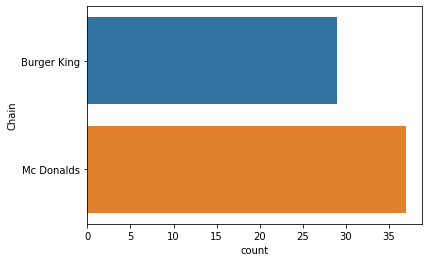

In [6]:
ax = sns.countplot(y = 'Chain', data = new_fast_food)

**!!! מכן ניתן לראות שברשת מקדונלד'ס יש מבחר גדול ועשיר יותר של מוצרים שעומדים בפרמטרים, ולכן נבחר לאכול שם בשביל הגיוון**

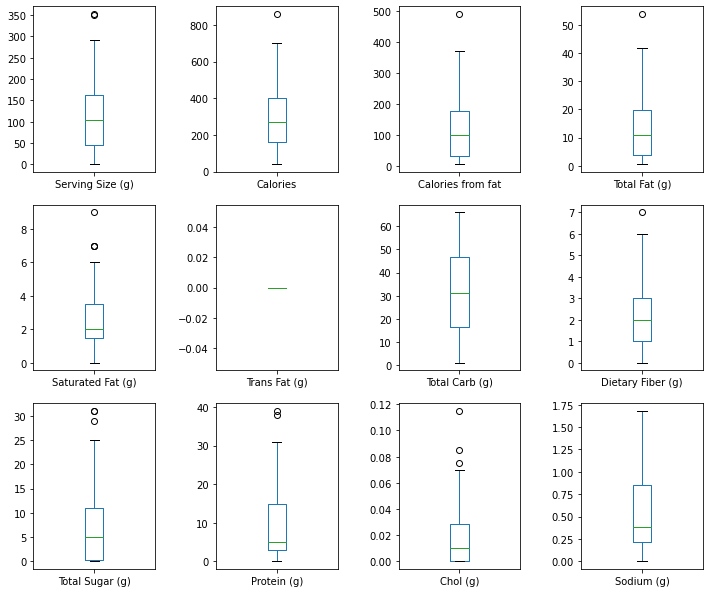

In [7]:
features = ['Serving Size (g)','Calories','Calories from fat','Total Fat (g)',
            'Saturated Fat (g)','Trans Fat (g)','Total Carb (g)','Dietary Fiber (g)',
            'Total Sugar (g)','Protein (g)','Chol (g)','Sodium (g)']
new_fast_food[features].plot(subplots = True, layout = (4,4), kind = 'box', figsize = (12,14), patch_artist = False)
plt.subplots_adjust(wspace = 0.5)

.אנו רואים שהחציון בגודל המנה, סך הקלוריות וסך הקלוריות משומן הוא הגבוה ביותר

.בוא נבדוק האם יש קשר בין שלושתם

array([[<AxesSubplot:title={'center':'Serving Size (g)'}>,
        <AxesSubplot:title={'center':'Calories'}>],
       [<AxesSubplot:title={'center':'Calories from fat'}>,
        <AxesSubplot:>]], dtype=object)

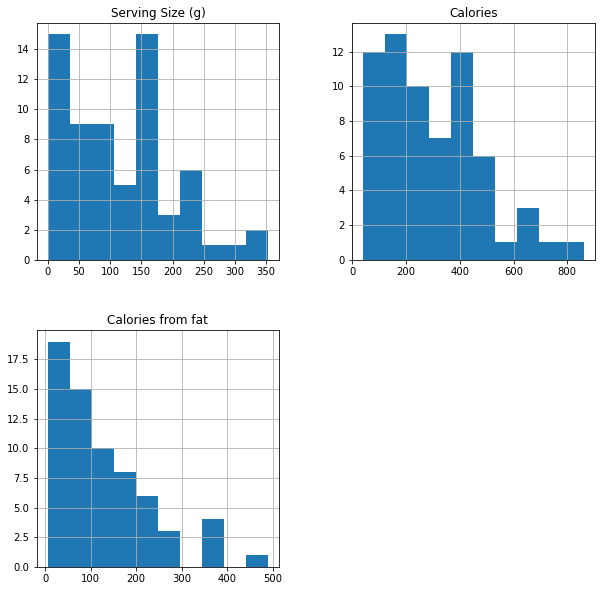

In [8]:
features = ['Serving Size (g)','Calories','Calories from fat']
new_fast_food.hist(features , bins = 10 , figsize = (10,10))

.ניתן לראות ששלושת הקטגוריות שלנו לא בהתפלגות נורמלית, לכן נבחר לבדוק קורולציה לפי קנדל


<AxesSubplot:>

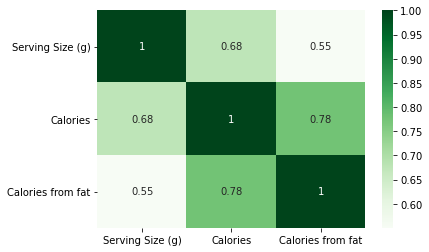

In [9]:
corr_df = new_fast_food[features].corr(method = "kendall")
sns.heatmap(data = corr_df , cmap = 'Greens', annot = True)
 

.על ידי הקורולציה, ניתן לראות שיש התאמה חזקה בין כמות הקלוריות לקלוריות שבאות מהשומן

**ככל שכמות הקלוריות בארוחה גדולה יותר כך הסיכוי למצוא בארוחה קלוריות מזיקות כגון : שומן טראנס, שומן רווי וכו**


## ? עכשיו נשאלת השאלה האם אדם שמכור למזון מהיר ואוהב להתאמן יכול למצוא מוצר שיספק לו את כמות החלבונים הנחוצה 

<AxesSubplot:ylabel='Item'>

<Figure size 432x288 with 0 Axes>

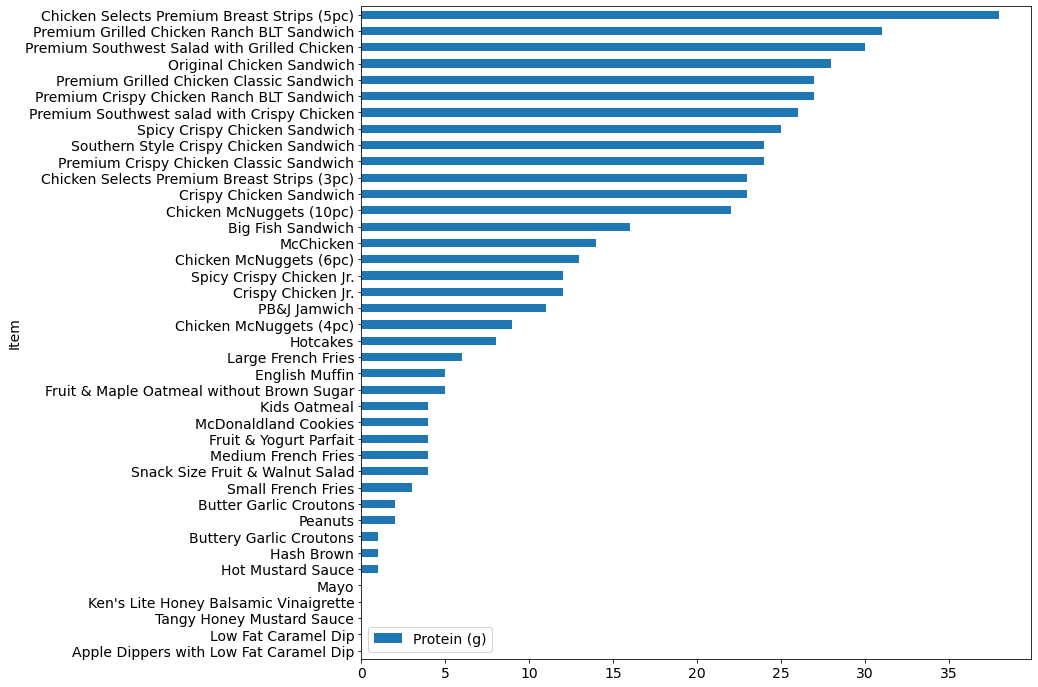

In [10]:
new_fast_food=new_fast_food[new_fast_food['Serving Size (g)']!=0]
new_fast_food=new_fast_food[new_fast_food['Item']!=0]

plt.figure()
plt.rcParams.update({'font.size': 14})
new_fast_food.sort_values(by = 'Protein (g)').plot.barh(x = 'Item',y = 'Protein (g)', figsize = (12,12), stacked = True)

.**והתשובה היא כן יש כמה וכמה מוצרים שיכולים לספק את כמות החלבונים בארוחה לאדם מתאמן**

# ? אז איזו רשת בריאה יותר מבחינת ערכים תזונתיים מקדונלד'ס או בורגר קינג  

In [11]:
s=new_fast_food.groupby("Chain").mean().reset_index()
s

,Chain,Serving Size (g),Calories,Calories from fat,Total Fat (g),Saturated Fat (g),Trans Fat (g),Total Carb (g),Dietary Fiber (g),Total Sugar (g),Protein (g),Chol (g),Sodium (g)
0,Burger King,134.181818,373.636364,195.454545,21.863636,3.636364,0.0,33.636364,1.818182,6.727273,12.000000,0.028636,0.646818
1,Mc Donalds,135.586207,288.103448,111.206897,12.379310,2.224138,0.0,31.965517,2.310345,7.000000,12.310345,0.019241,0.528276


# אפשר להסיק שרשת מקדונלד'ס יותר מזינה מבחינת ערכים תזונתיים מבין שני הרשתות שנבדקו  

:ראה גרף

array([[<AxesSubplot:title={'center':'Calories'}>,
        <AxesSubplot:title={'center':'Protein (g)'}>],
       [<AxesSubplot:title={'center':'Dietary Fiber (g)'}>,
        <AxesSubplot:title={'center':'Total Sugar (g)'}>]], dtype=object)

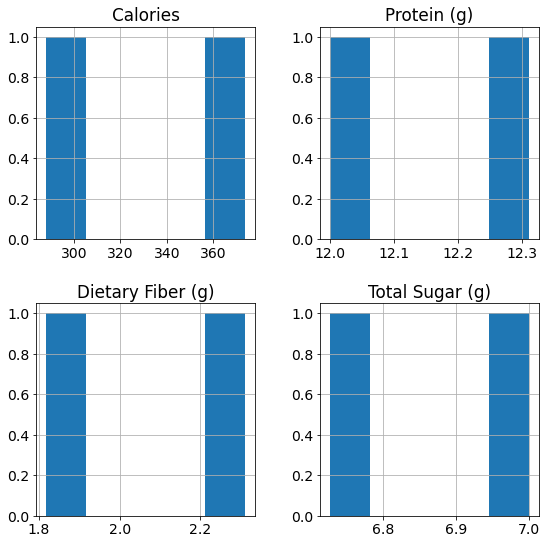

In [26]:
s[['Calories', 'Protein (g)', 'Dietary Fiber (g)', 'Total Sugar (g)']].hist(figsize = (9,9), bins = 5)